In [1]:
import pandas as pd

In [2]:
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [13]:
# 저장된 피클 파일 불러오기
df = pd.read_pickle("C:/ZIPcoding/dataset0222_encoded.pkl")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   접수연도            515083 non-null  int64         
 1   자치구코드           515083 non-null  object        
 2   자치구명            515083 non-null  object        
 3   법정동코드           515083 non-null  object        
 4   법정동명            515083 non-null  object        
 5   본번              515083 non-null  int64         
 6   부번              515083 non-null  int64         
 7   주소              515083 non-null  object        
 8   위도              515083 non-null  float64       
 9   경도              515083 non-null  float64       
 10  geometry        515083 non-null  object        
 11  건물명             515083 non-null  object        
 12  계약일             515083 non-null  datetime64[ns]
 13  실거래가            515083 non-null  int64         
 14  평당가격            515083 non-null  float64 

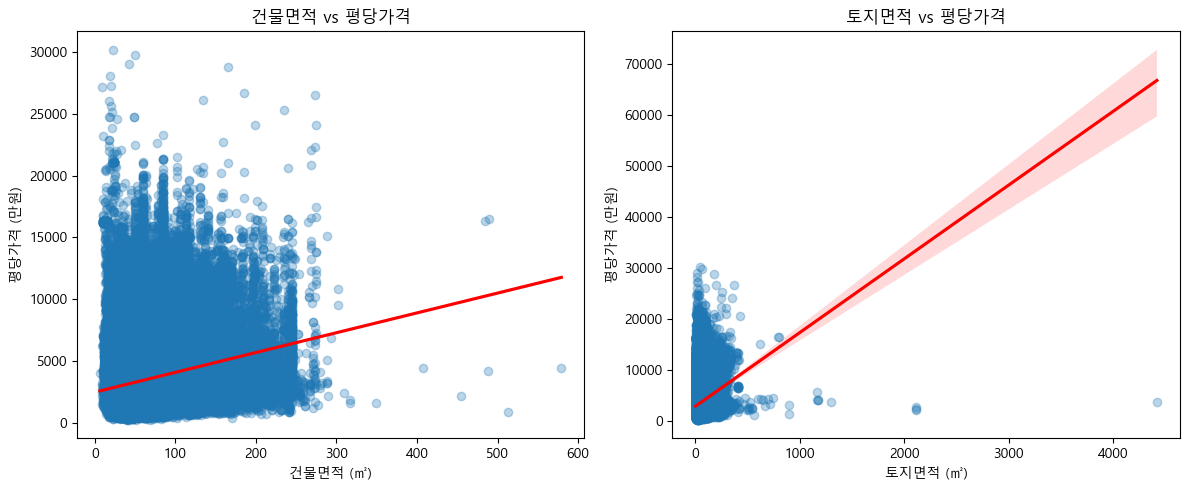

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(12, 5))

# 건물면적 vs 평당가격 (왼쪽)
plt.subplot(1, 2, 1)
sns.regplot(x=df["건물면적"], y=df["평당가격"], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("건물면적 (㎡)")
plt.ylabel("평당가격 (만원)")
plt.title("건물면적 vs 평당가격")

# 토지면적 vs 평당가격 (오른쪽)
plt.subplot(1, 2, 2)
sns.regplot(x=df["토지면적"], y=df["평당가격"], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.xlabel("토지면적 (㎡)")
plt.ylabel("평당가격 (만원)")
plt.title("토지면적 vs 평당가격")

# 그래프 레이아웃 조정
plt.tight_layout()

# 그래프 저장
plt.savefig("C:/ZIPcoding/plots/area_vs_price.png", dpi=300, bbox_inches="tight")

# 그래프 출력
plt.show()


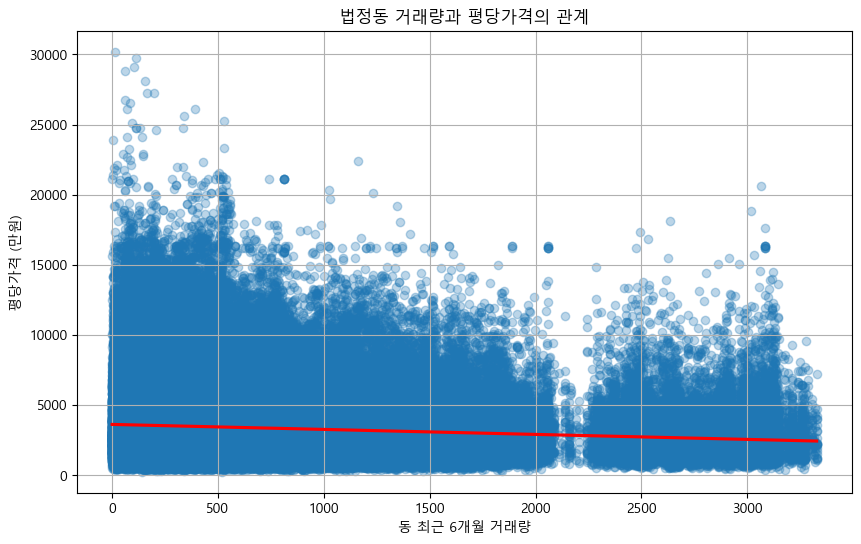

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기 (산점도 + 회귀선)
plt.figure(figsize=(10, 6))
sns.regplot(x=df["동최근6개월거래량"], y=df["평당가격"], scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("법정동 거래량과 평당가격의 관계")
plt.xlabel("동 최근 6개월 거래량")
plt.ylabel("평당가격 (만원)")
plt.grid(True)
plt.show()


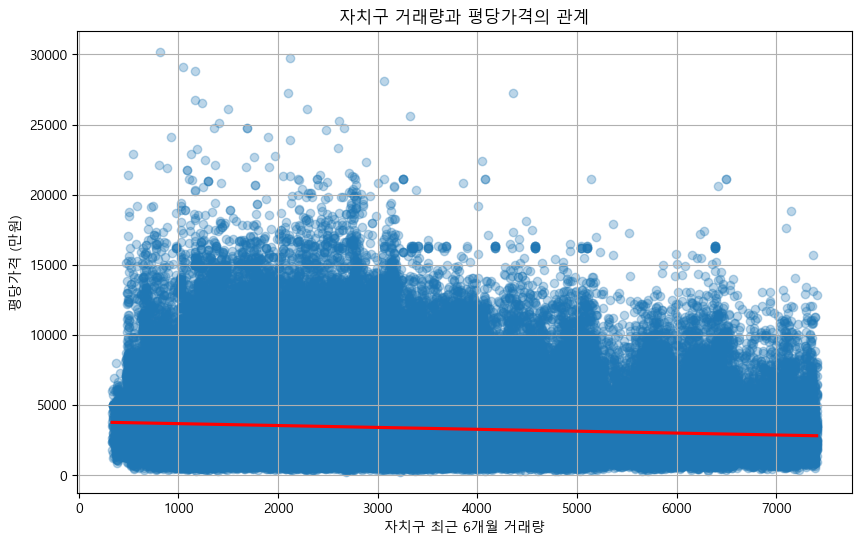

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 그리기 (산점도 + 회귀선)
plt.figure(figsize=(10, 6))
sns.regplot(x=df["자치구최근6개월거래량"], y=df["평당가격"], scatter_kws={"alpha":0.3}, line_kws={"color":"red"})
plt.title("자치구 거래량과 평당가격의 관계")
plt.xlabel("자치구 최근 6개월 거래량")
plt.ylabel("평당가격 (만원)")
plt.grid(True)
plt.show()


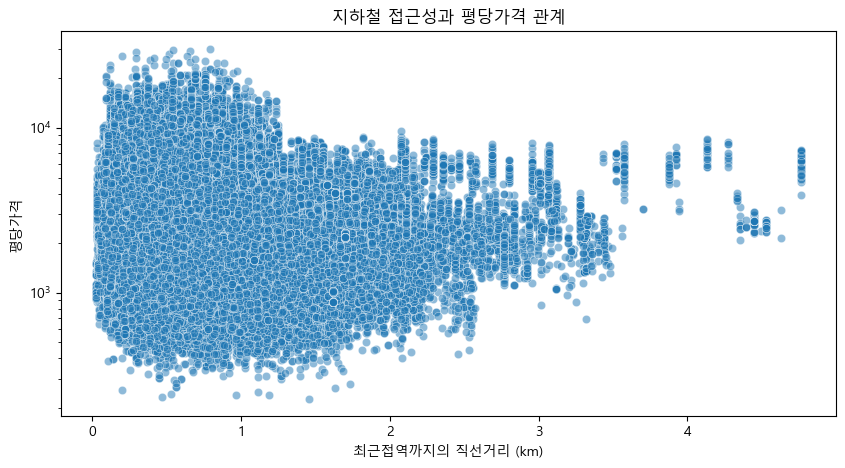

In [19]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["최근접역_직선거리"], y=df["평당가격"], alpha=0.5)
plt.xlabel("최근접역까지의 직선거리 (km)")
plt.ylabel("평당가격")
plt.title("지하철 접근성과 평당가격 관계")
plt.yscale("log")
plt.show()


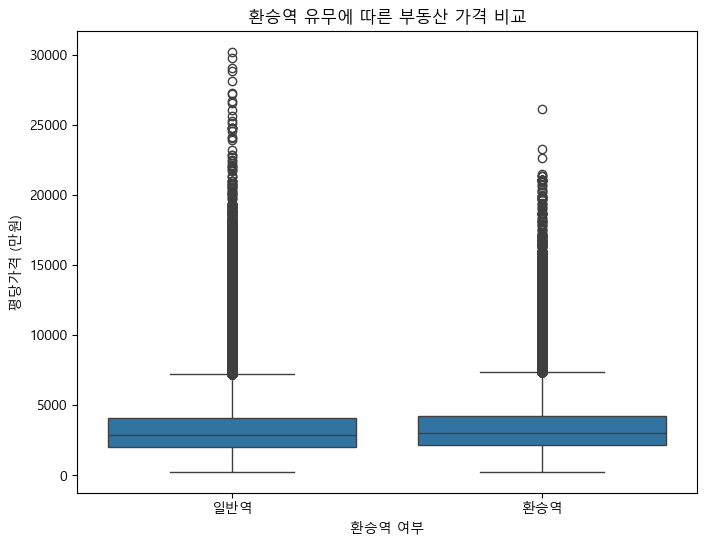

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='최근접역_환승역구분', y='평당가격')
plt.xlabel('환승역 여부')
plt.ylabel('평당가격 (만원)')
plt.title('환승역 유무에 따른 부동산 가격 비교')
plt.show()


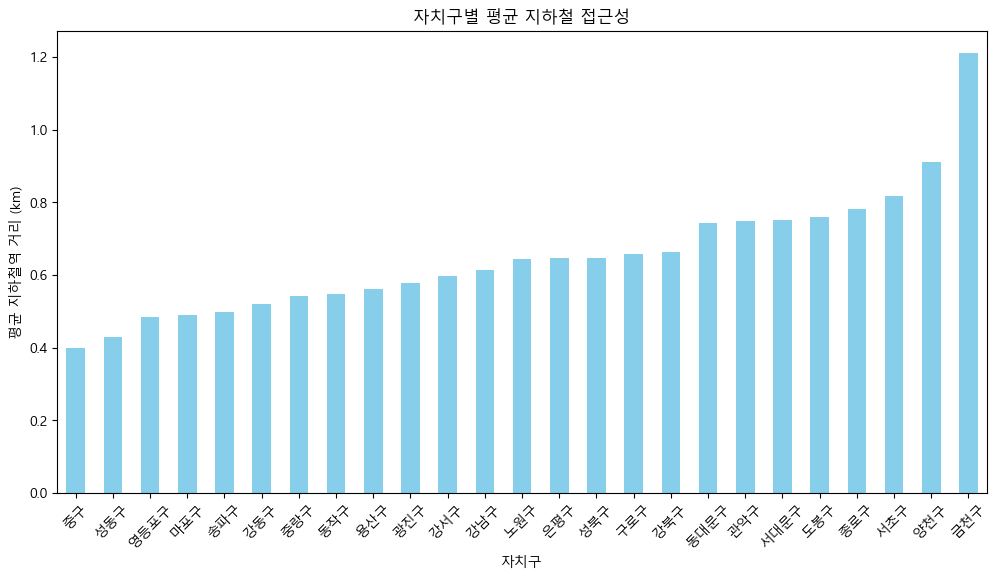

In [23]:
df_distance = df.groupby('자치구명')['최근접역_직선거리'].mean().sort_values()
plt.figure(figsize=(12, 6))
df_distance.plot(kind='bar', color='skyblue')
plt.xlabel('자치구')
plt.ylabel('평균 지하철역 거리 (km)')
plt.title('자치구별 평균 지하철 접근성')
plt.xticks(rotation=45)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_15108\553370150.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_avg_price, x="평당가격", y="노선", palette="magma")  # 가로 방향 변경 & 컬러맵 적용


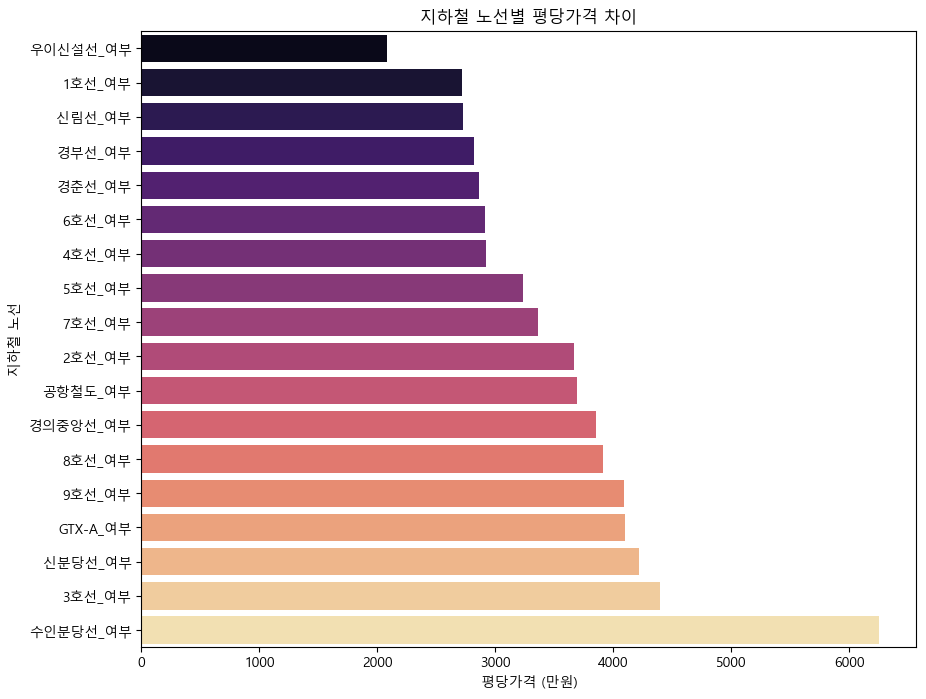

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 노선별 데이터 변환 (melt)
df_melted = df.melt(id_vars=['평당가격'], value_vars=[
    "1호선_여부", "경의중앙선_여부", "신림선_여부", "2호선_여부", "3호선_여부", "7호선_여부",
    "우이신설선_여부", "9호선_여부", "공항철도_여부", "6호선_여부", "경부선_여부", "경춘선_여부",
    "신분당선_여부", "수인분당선_여부", "8호선_여부", "5호선_여부", "4호선_여부", "GTX-A_여부"
], var_name='노선', value_name='포함여부')

# 해당 노선에 포함된 데이터만 필터링
df_melted = df_melted[df_melted['포함여부'] == 1]

# 노선별 평균 평당가격 계산
df_avg_price = df_melted.groupby("노선")["평당가격"].mean().reset_index()

# 정렬 (평당가격 높은 순)
df_avg_price = df_avg_price.sort_values(by="평당가격", ascending=True)

# 📌 가로 막대 그래프 (색상 변경 & 정렬 반영)
plt.figure(figsize=(10, 8))
sns.barplot(data=df_avg_price, x="평당가격", y="노선", palette="magma")  # 가로 방향 변경 & 컬러맵 적용

plt.xlabel("평당가격 (만원)")
plt.ylabel("지하철 노선")
plt.title("지하철 노선별 평당가격 차이")
plt.show()


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   접수연도            515083 non-null  int64         
 1   자치구코드           515083 non-null  object        
 2   자치구명            515083 non-null  object        
 3   법정동코드           515083 non-null  object        
 4   법정동명            515083 non-null  object        
 5   본번              515083 non-null  int64         
 6   부번              515083 non-null  int64         
 7   주소              515083 non-null  object        
 8   위도              515083 non-null  float64       
 9   경도              515083 non-null  float64       
 10  geometry        515083 non-null  object        
 11  건물명             515083 non-null  object        
 12  계약일             515083 non-null  datetime64[ns]
 13  실거래가            515083 non-null  int64         
 14  평당가격            515083 non-null  float64 

In [39]:
# bool 타입 컬럼을 int로 변환
bool_columns = [
    "건물용도_아파트", "건물용도_연립다세대", "건물용도_오피스텔",
    "면적구분_소형", "면적구분_중형",
    "서울5대학군지여부_1", "한강변여부_1", "최근접역_환승역구분_환승역"
]

df[bool_columns] = df[bool_columns].astype(int)

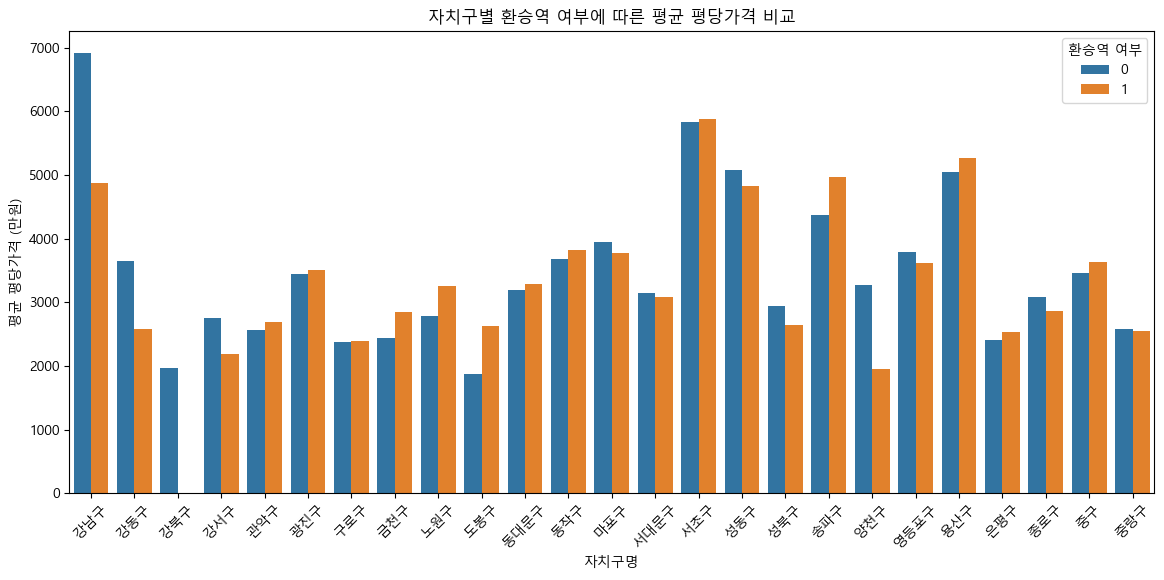

In [45]:

# 자치구별, 환승역 여부별 평당가격 평균 계산
df_grouped = df.groupby(['자치구명', '최근접역_환승역구분_환승역'])['평당가격'].mean().reset_index()

# 그래프 그리기
plt.figure(figsize=(14, 6))
sns.barplot(data=df_grouped, x='자치구명', y='평당가격', hue='최근접역_환승역구분_환승역')

plt.xticks(rotation=45)
plt.xlabel('자치구명')
plt.ylabel('평균 평당가격 (만원)')
plt.title('자치구별 환승역 여부에 따른 평균 평당가격 비교')
plt.legend(title='환승역 여부')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15108\3709255039.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top10, x='최근접역', y='평당가격', palette='Reds_r')


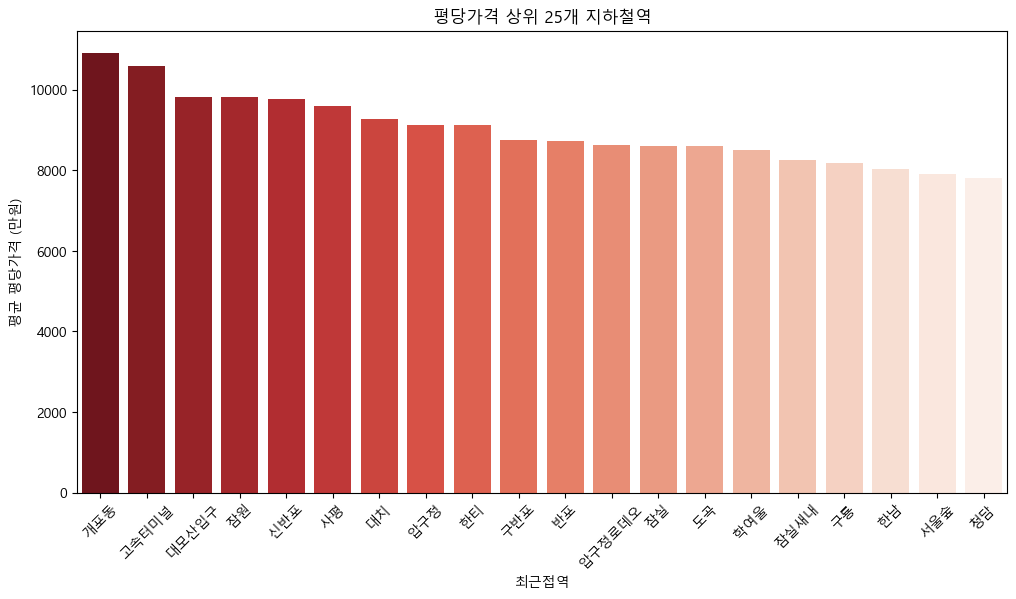

C:\Users\user\AppData\Local\Temp\ipykernel_15108\3709255039.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bottom10, x='최근접역', y='평당가격', palette='Blues')


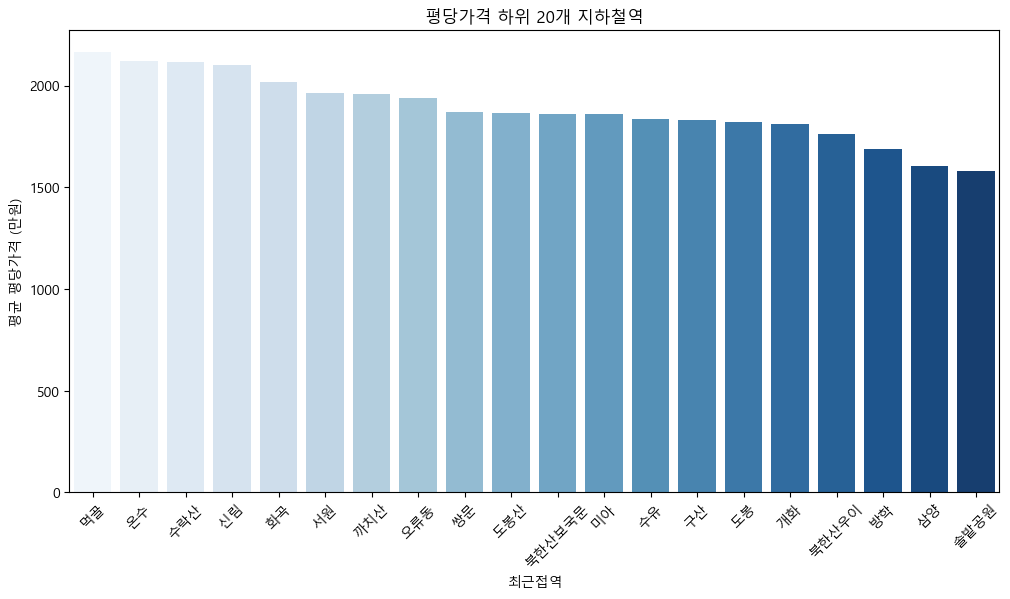

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 최근접역별 평당가격 평균 계산
df_grouped = df.groupby('최근접역')['평당가격'].mean().reset_index()

# 최근접역 기준 정렬 (평당가격 높은 순)
df_sorted = df_grouped.sort_values(by='평당가격', ascending=False)

# 상위 10개 및 하위 10개 역 선택
df_top10 = df_sorted.head(20)
df_bottom10 = df_sorted.tail(20)

# 상위 20개 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top10, x='최근접역', y='평당가격', palette='Reds_r')
plt.xticks(rotation=45)
plt.xlabel('최근접역')
plt.ylabel('평균 평당가격 (만원)')
plt.title('평당가격 상위 25개 지하철역')
plt.show()

# 하위 20개 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_bottom10, x='최근접역', y='평당가격', palette='Blues')
plt.xticks(rotation=45)
plt.xlabel('최근접역')
plt.ylabel('평균 평당가격 (만원)')
plt.title('평당가격 하위 20개 지하철역')
plt.show()


In [65]:
df_sorted

,최근접역,평당가격
0,개포동,10917.771461
1,고속터미널,10587.215458
2,대모산입구,9814.348685
3,잠원,9811.382670
4,신반포,9760.422311
...,...,...
291,개화,1808.469150
292,북한산우이,1762.347920
293,방학,1687.312236
294,삼양,1603.354946


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 60 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   접수연도            515083 non-null  int64         
 1   자치구코드           515083 non-null  object        
 2   자치구명            515083 non-null  object        
 3   법정동코드           515083 non-null  object        
 4   법정동명            515083 non-null  object        
 5   본번              515083 non-null  int64         
 6   부번              515083 non-null  int64         
 7   주소              515083 non-null  object        
 8   위도              515083 non-null  float64       
 9   경도              515083 non-null  float64       
 10  geometry        515083 non-null  object        
 11  건물명             515083 non-null  object        
 12  계약일             515083 non-null  datetime64[ns]
 13  실거래가            515083 non-null  int64         
 14  평당가격            515083 non-null  float64 

In [5]:
subway = pd.read_csv('C:/ZIPcoding/subway0222.csv')

In [155]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 335
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   역번호      307 non-null    object 
 1   역사명      307 non-null    object 
 2   노선번호     307 non-null    object 
 3   노선명      307 non-null    object 
 4   영문역사명    307 non-null    object 
 5   한자역사명    307 non-null    object 
 6   환승역구분    307 non-null    object 
 7   환승노선번호   73 non-null     object 
 8   환승노선명    74 non-null     object 
 9   역위도      307 non-null    float64
 10  역경도      307 non-null    float64
 11  운영기관명    307 non-null    object 
 12  역사도로명주소  307 non-null    object 
 13  역사전화번호   298 non-null    object 
 14  데이터기준일자  298 non-null    object 
dtypes: float64(2), object(13)
memory usage: 38.4+ KB


In [157]:
subway = subway[['역사명', '역위도', '역경도']]

In [159]:
subway

,역사명,역위도,역경도
0,공덕,37.544431,126.951372
1,청량리,37.580543,127.046516
2,회기,37.589802,127.057936
3,동대문역사문화공원,37.565613,127.005353
4,김포공항,37.562384,126.801292
...,...,...,...
331,삼양,37.626914,127.018106
332,삼양사거리,37.621497,127.019719
333,솔샘,37.620238,127.013626
334,북한산보국문,37.618140,126.997969


In [11]:
import folium
import numpy as np
import matplotlib.colors as mcolors

# '최근접역' 기준으로 평당가격 평균 계산

df_grouped = df.groupby('최근접역').agg({'평당가격': 'mean'}).reset_index()

# subway 데이터와 병합 (최근접역 = 역사명 기준으로 매칭)
df_merged = df_grouped.merge(subway, left_on='최근접역', right_on='역사명', how='left')

# 병합 후 결측치 제거 (일치하는 역사명만 사용)
df_merged = df_merged.dropna(subset=['역위도', '역경도'])

# 평당가격을 0~1 사이로 정규화
norm = (df_merged['평당가격'] - df_merged['평당가격'].min()) / (df_merged['평당가격'].max() - df_merged['평당가격'].min())

# 컬러맵 설정 (블루 → 그린 → 옐로우 → 오렌지 → 레드)
colormap = mcolors.LinearSegmentedColormap.from_list("grad", ["darkblue", "cyan", "yellow", "red", "darkred"])
# ["blue", "green", "yellow", "orange", "red"]
# 정규화된 평당가격 값을 색상 리스트로 변환
colors = [mcolors.to_hex(colormap(val)) for val in norm.values]

# 지도 생성 (서울 지역 중심)
m = folium.Map(location=[df_merged['역위도'].mean(), df_merged['역경도'].mean()], zoom_start=11)

# 마커 추가 (정규화된 평당가격 값을 기반으로 컬러 적용)
for (lat, lon, station, price, color) in zip(df_merged['역위도'], df_merged['역경도'], df_merged['최근접역'], df_merged['평당가격'], colors):
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,  # 원 크기
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.8,
        popup=f"{station}: {price:.2f} 만원/평"
    ).add_to(m)

# 지도 표시
m


In [165]:
import folium
import numpy as np

# '최근접역' 기준으로 평당가격 평균 계산
df_grouped = df.groupby('최근접역').agg({'평당가격': 'mean'}).reset_index()

# subway 데이터와 병합 (최근접역 = 역사명 기준으로 매칭)
df_merged = df_grouped.merge(subway, left_on='최근접역', right_on='역사명', how='left')

# 병합 후 결측치 제거 (일치하는 역사명만 사용)
df_merged = df_merged.dropna(subset=['역위도', '역경도'])

# 평당가격 구간 설정 (최소~최대값을 5개 구간으로 나눔)
bins = np.linspace(df_merged['평당가격'].min(), df_merged['평당가격'].max(), 6)

# 구간별 색상 지정 (그라데이션 없이 고정된 색상 사용)
color_map = {
    0: "blue",      # 가장 낮은 가격
    1: "green",
    2: "yellow",
    3: "orange",
    4: "red"        # 가장 높은 가격
}

# 각 가격을 해당 구간의 색상으로 매핑
df_merged["color_category"] = np.digitize(df_merged["평당가격"], bins) - 1  # 0부터 시작하도록 조정
df_merged["color"] = df_merged["color_category"].map(color_map)

# 지도 생성 (서울 지역 중심)
m = folium.Map(location=[df_merged['역위도'].mean(), df_merged['역경도'].mean()], zoom_start=11)

# 마커 추가 (색상 그라데이션 없이 범주형 적용)
for (lat, lon, station, price, color) in zip(df_merged['역위도'], df_merged['역경도'], df_merged['최근접역'], df_merged['평당가격'], df_merged["color"]):
    folium.CircleMarker(
        location=[lat, lon],
        radius=7,  # 원 크기
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.85,
        popup=f"{station}: {price:.2f} 만원/평"
    ).add_to(m)

# 지도 표시
m


C:\Users\user\AppData\Local\Temp\ipykernel_15108\3099740966.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='도보구간', y='평당가격', palette='coolwarm')


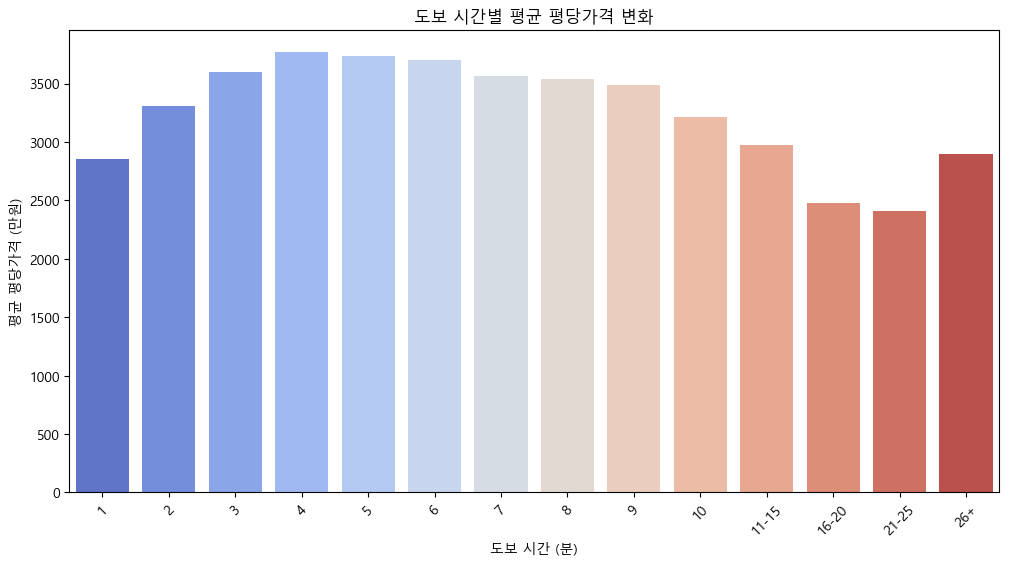

In [175]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# 도보 속도 설정 (평균 도보 속도: 80m/min 기준)
WALKING_SPEED = 80  # m/min

# km 단위를 m로 변환 후 도보 시간 계산
df['도보시간'] = (df['최근접역_직선거리'] * 1000) / WALKING_SPEED

# 도보 시간을 1~10분, 10분 이상(11~15, 16~20, 21~25, 26+ 구간 추가)
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, np.inf]  # 10분 이상 구간 추가
labels = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11-15", "16-20", "21-25", "26+"]
df['도보구간'] = np.digitize(df['도보시간'], bins=bins, right=True)
df['도보구간'] = df['도보구간'].apply(lambda x: labels[x-1])

# 도보 시간별 평균 평당가격 계산
df_grouped = df.groupby('도보구간')['평당가격'].mean().reset_index()

# 도보 시간 구간을 정렬된 순서로 유지
df_grouped['도보구간'] = pd.Categorical(df_grouped['도보구간'], categories=labels, ordered=True)

# 다시 정렬
df_grouped = df_grouped.sort_values('도보구간')

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='도보구간', y='평당가격', palette='coolwarm')

plt.xlabel('도보 시간 (분)')
plt.ylabel('평균 평당가격 (만원)')
plt.title('도보 시간별 평균 평당가격 변화')
plt.xticks(rotation=45)  # 긴 구간명이 잘 보이도록 회전

plt.show()


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515083 entries, 0 to 515083
Data columns (total 62 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   접수연도            515083 non-null  int64         
 1   자치구코드           515083 non-null  object        
 2   자치구명            515083 non-null  object        
 3   법정동코드           515083 non-null  object        
 4   법정동명            515083 non-null  object        
 5   본번              515083 non-null  int64         
 6   부번              515083 non-null  int64         
 7   주소              515083 non-null  object        
 8   위도              515083 non-null  float64       
 9   경도              515083 non-null  float64       
 10  geometry        515083 non-null  object        
 11  건물명             515083 non-null  object        
 12  계약일             515083 non-null  datetime64[ns]
 13  실거래가            515083 non-null  int64         
 14  평당가격            515083 non-null  float64 

C:\Users\user\AppData\Local\Temp\ipykernel_15108\1817723065.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_line_stats, x="노선", y="평당가격", palette="coolwarm")


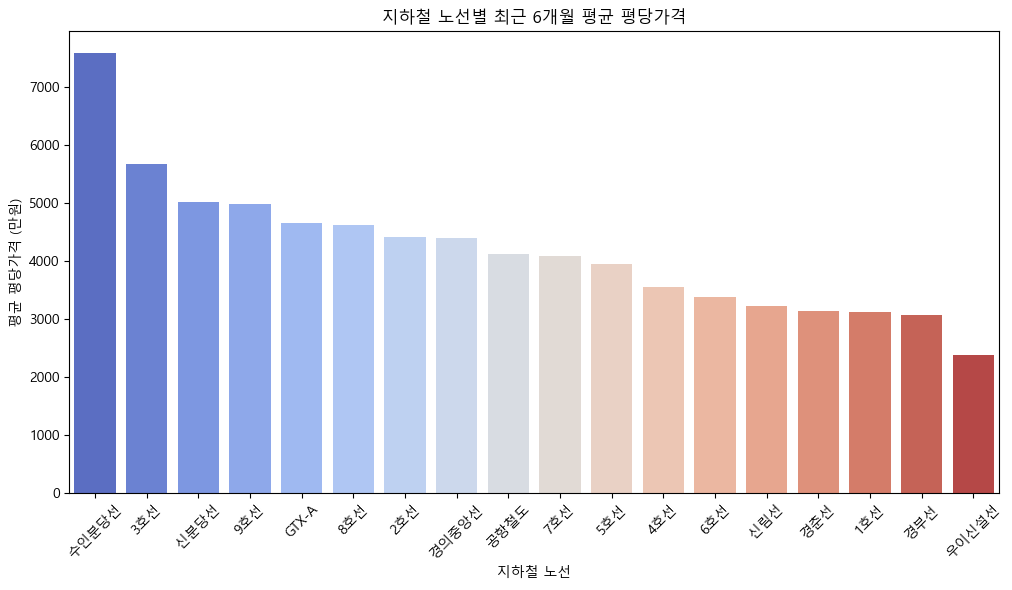

C:\Users\user\AppData\Local\Temp\ipykernel_15108\1817723065.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_line_stats, x="노선", y="거래량", palette="coolwarm")


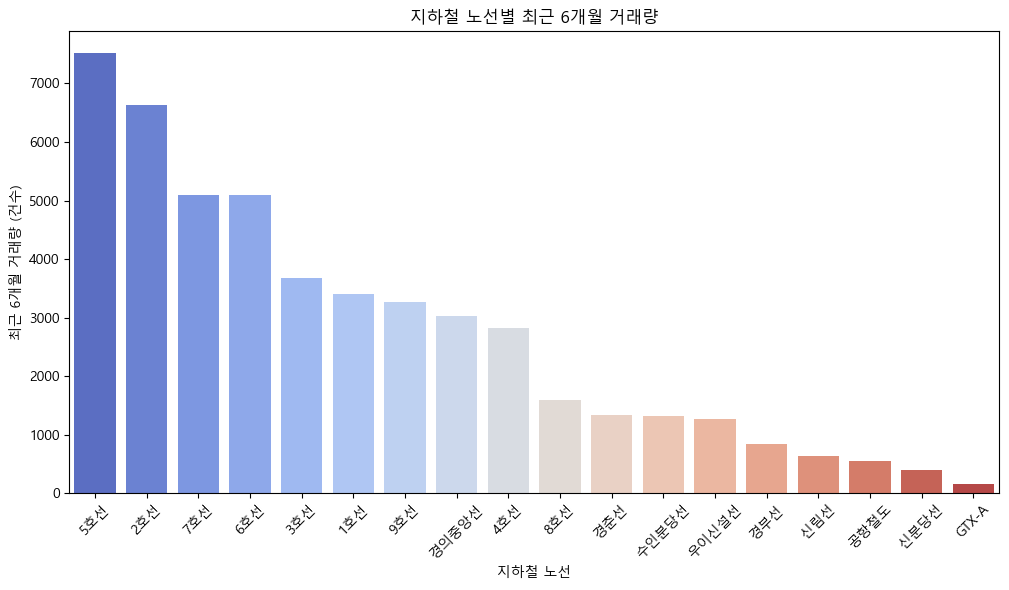

In [187]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 기준일 설정 (2025-02-13)
reference_date = datetime.datetime(2025, 2, 13)

# 6개월 전 날짜 계산
six_months_ago = reference_date - pd.DateOffset(months=6)

# 최근 6개월 데이터 필터링
df_recent = df[df["계약일"] >= six_months_ago]

# 지하철 노선 관련 컬럼만 추출
line_columns = [
    "1호선_여부", "경의중앙선_여부", "신림선_여부", "2호선_여부", "3호선_여부", "7호선_여부",
    "우이신설선_여부", "9호선_여부", "공항철도_여부", "6호선_여부", "경부선_여부", "경춘선_여부",
    "신분당선_여부", "수인분당선_여부", "8호선_여부", "5호선_여부", "4호선_여부", "GTX-A_여부"
]

# 노선별 평균 평당가격 및 거래량 계산
line_data = []
for line in line_columns:
    subset = df_recent[df_recent[line] == 1]  # 해당 노선이 True(1)인 데이터만 선택
    avg_price = subset["평당가격"].mean()
    transaction_count = subset.shape[0]  # 거래량: 계약 건수(count)

    line_data.append({"노선": line.replace("_여부", ""), "평당가격": avg_price, "거래량": transaction_count})

# 데이터프레임 변환
df_line_stats = pd.DataFrame(line_data)

# 정렬 (평당가격 높은 순)
df_line_stats = df_line_stats.sort_values(by="평당가격", ascending=False)

# 📌 평당가격 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_line_stats, x="노선", y="평당가격", palette="coolwarm")
plt.xlabel("지하철 노선")
plt.ylabel("평균 평당가격 (만원)")
plt.title("지하철 노선별 최근 6개월 평균 평당가격")
plt.xticks(rotation=45)
plt.show()

df_line_stats = df_line_stats.sort_values(by="거래량", ascending=False)

# 📌 거래량 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=df_line_stats, x="노선", y="거래량", palette="coolwarm")
plt.xlabel("지하철 노선")
plt.ylabel("최근 6개월 거래량 (건수)")
plt.title("지하철 노선별 최근 6개월 거래량")
plt.xticks(rotation=45)
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_15108\3771649756.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_station_stats.head(20), x="최근접역", y="평당가격", palette="coolwarm")


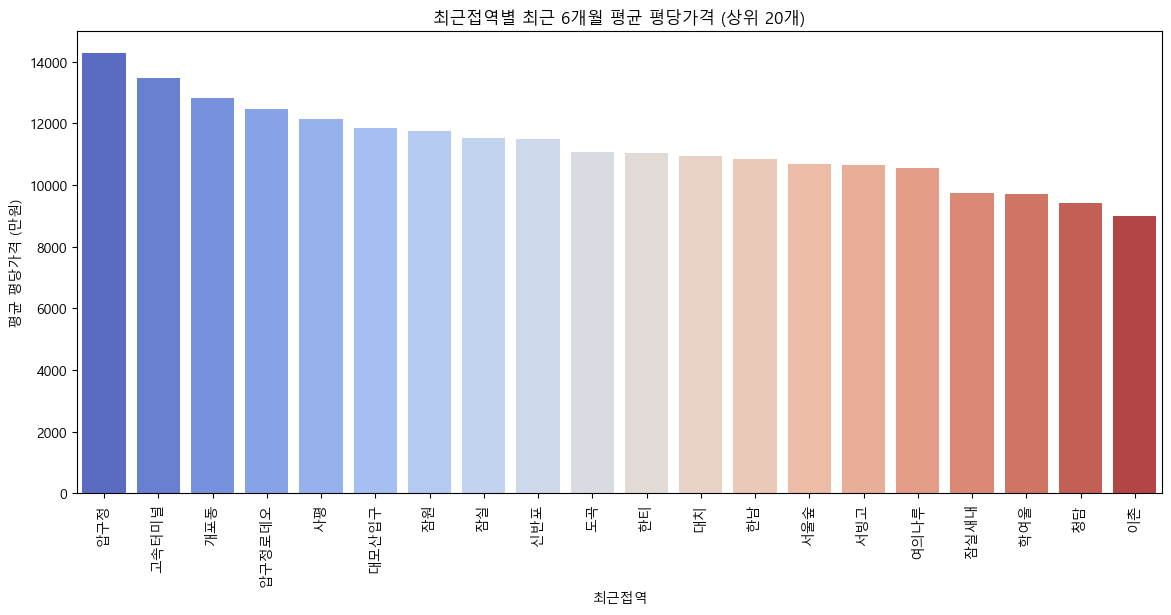

C:\Users\user\AppData\Local\Temp\ipykernel_15108\3771649756.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_station_stats.head(20), x="최근접역", y="거래량", palette="coolwarm")


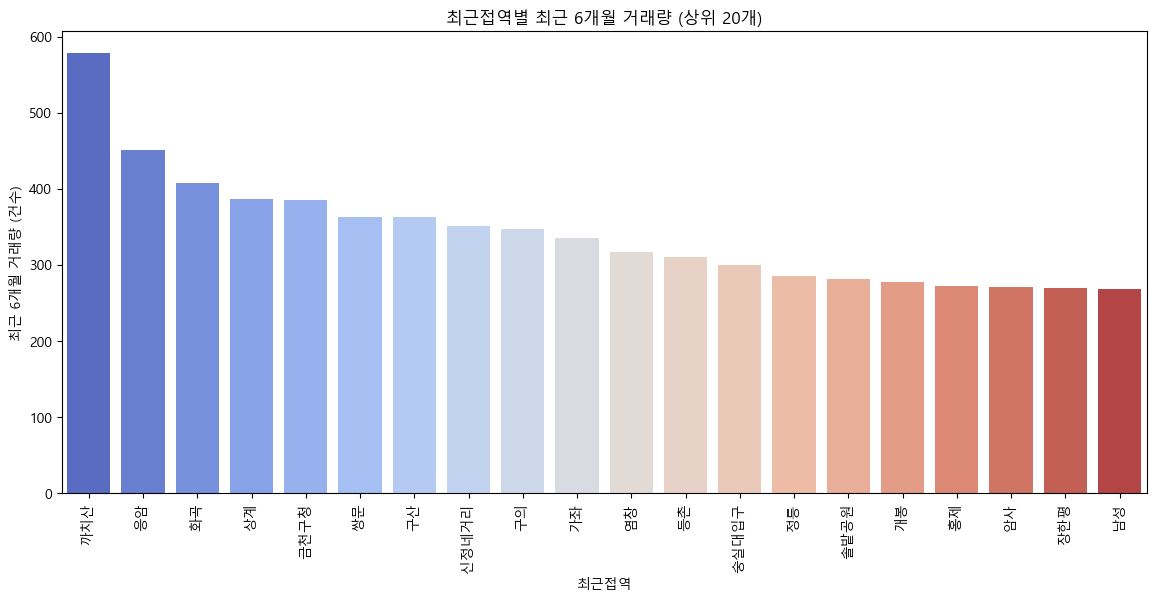

In [193]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# 기준일 설정 (2025-02-13)
reference_date = datetime.datetime(2025, 2, 13)

# 6개월 전 날짜 계산
six_months_ago = reference_date - pd.DateOffset(months=6)

# 최근 6개월 데이터 필터링
df_recent = df[df["계약일"] >= six_months_ago]

# 최근접역별 평균 평당가격 및 거래량 계산
df_station_stats = df_recent.groupby("최근접역").agg({
    "평당가격": "mean",   # 평균 평당가격
    "계약일": "count"    # 거래량(계약 건수)
}).reset_index()

# 컬럼명 변경
df_station_stats.rename(columns={"계약일": "거래량"}, inplace=True)

# 정렬 (평당가격 높은 순)
df_station_stats = df_station_stats.sort_values(by="평당가격", ascending=False)

# 📌 최근접역별 평균 평당가격 시각화 (상위 20개)
plt.figure(figsize=(14, 6))
sns.barplot(data=df_station_stats.head(20), x="최근접역", y="평당가격", palette="coolwarm")
plt.xlabel("최근접역")
plt.ylabel("평균 평당가격 (만원)")
plt.title("최근접역별 최근 6개월 평균 평당가격 (상위 20개)")
plt.xticks(rotation=90)
plt.show()

df_station_stats = df_station_stats.sort_values(by="거래량", ascending=False)

# 📌 최근접역별 거래량(계약 건수) 시각화 (상위 20개)
plt.figure(figsize=(14, 6))
sns.barplot(data=df_station_stats.head(20), x="최근접역", y="거래량", palette="coolwarm")
plt.xlabel("최근접역")
plt.ylabel("최근 6개월 거래량 (건수)")
plt.title("최근접역별 최근 6개월 거래량 (상위 20개)")
plt.xticks(rotation=90)
plt.show()
